---
# Boston Housing Prices Prediction: Linear Regression
---

---
## Objective
---

The problem on hand is to predict the housing prices of a town or a suburb based on the features of the locality provided to us. In the process, we need to identify the most important features in the dataset. We need to employ techniques of data preprocessing and build a linear regression model that predicts the prices for us. 

----------------------------
## Data Information
---------------------------

Each record in the database describes a Boston suburb or town. The data was drawn from the Boston Standard Metropolitan Statistical Area (SMSA) in 1970. Detailed attribute information can be found below-

Attribute Information (in order):
- **CRIM:**     per capita crime rate by town
- **ZN:**       proportion of residential land zoned for lots over 25,000 sq.ft.
- **INDUS:**    proportion of non-retail business acres per town
- **CHAS:**     Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)
- **NOX:**      nitric oxides concentration (parts per 10 million)
- **RM:**       average number of rooms per dwelling
- **AGE:**     proportion of owner-occupied units built before 1940
- **DIS:**      weighted distances to five Boston employment centers
- **RAD:**      index of accessibility to radial highways
- **TAX:**      full-value property-tax rate per 10,000 dollars
- **PTRATIO:**  pupil-teacher ratio by town
- **B - 1000(Bk - 0.63)^2** where Bk is the proportion of blacks by town
- **LSTAT:**    %lower status of the population
- **MEDV:**     Median value of owner-occupied homes in 1000 dollars

## Importing the required libraries

In [1]:
# import libraries for data manipulation
import pandas as pd
import numpy as np

# import libraries for data visualization
import matplotlib.pyplot as plt
import seaborn as sns
from statsmodels.graphics.gofplots import ProbPlot

# import libraries for building linear regression model
from statsmodels.formula.api import ols
import statsmodels.api as sm
from sklearn.linear_model import LinearRegression

# import library for preparing data
from sklearn.model_selection import train_test_split

# import library for data preprocessing
from sklearn.preprocessing import MinMaxScaler

import warnings
warnings.filterwarnings("ignore")

### Reading the dataset

In [8]:
df = pd.read_csv('~/Desktop/Kaggle Projects/boston-2.csv')
df.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222.0,18.7,396.90,5.33,36.2


**Observations:**

* The price of the house indicated by the variable MEDV is the target variable and the rest are the independent variables based on which we will predict house price.

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 14 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   CRIM     506 non-null    float64
 1   ZN       506 non-null    float64
 2   INDUS    506 non-null    float64
 3   CHAS     506 non-null    int64  
 4   NOX      506 non-null    float64
 5   RM       506 non-null    float64
 6   AGE      506 non-null    float64
 7   DIS      506 non-null    float64
 8   RAD      506 non-null    int64  
 9   TAX      506 non-null    float64
 10  PTRATIO  506 non-null    float64
 11  B        506 non-null    float64
 12  LSTAT    506 non-null    float64
 13  MEDV     506 non-null    float64
dtypes: float64(12), int64(2)
memory usage: 55.5 KB


**Observations**
* There are a total of 506 non-null observations in each of the columns. This indicates that there are no missing values in the data.

* Every column in this dataset is numeric in nature.

In [10]:
df.describe()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
count,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000
mean,3.613524,11.363636,11.136779,0.069170,0.554695,6.284634,68.574901,3.795043,9.549407,408.237154,18.455534,356.674032,12.653063,22.532806
std,8.601545,23.322453,6.860353,0.253994,0.115878,0.702617,28.148861,2.105710,8.707259,168.537116,2.164946,91.294864,7.141062,9.197104
min,0.006320,0.000000,0.460000,0.000000,0.385000,3.561000,2.900000,1.129600,1.000000,187.000000,12.600000,0.320000,1.730000,5.000000
25%,0.082045,0.000000,5.190000,0.000000,0.449000,5.885500,45.025000,2.100175,4.000000,279.000000,17.400000,375.377500,6.950000,17.025000
50%,0.256510,0.000000,9.690000,0.000000,0.538000,6.208500,77.500000,3.207450,5.000000,330.000000,19.050000,391.440000,11.360000,21.200000
75%,3.677082,12.500000,18.100000,0.000000,0.624000,6.623500,94.075000,5.188425,24.000000,666.000000,20.200000,396.225000,16.955000,25.000000
max,88.976200,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,396.900000,37.970000,50.000000


**Observations:**

* There is an average of around 6.2 rooms per dwelling across all the towns. 

* There is a very large variance for crime rate, as we can see that the lowest crime rate is 0.006 whereas the highest one is 88.97. It could be an outlier since it is very different from the median and even 75% quantile value. 

Before performing the modeling, it is important to check the univariate distribution of the variables.

### Univariate Analysis

#### Checking the distribution of the variables

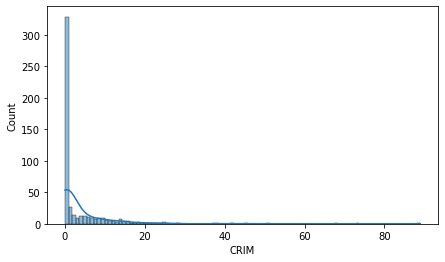

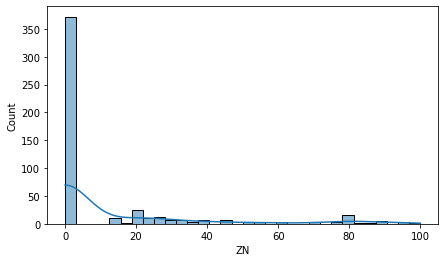

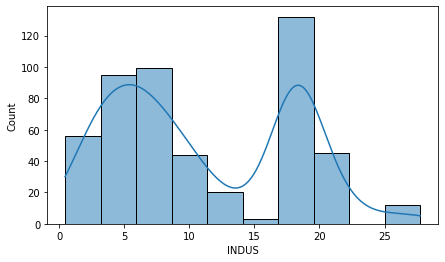

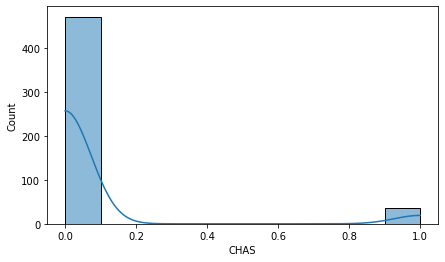

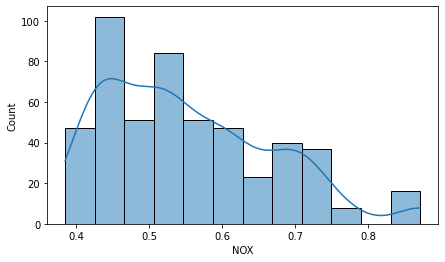

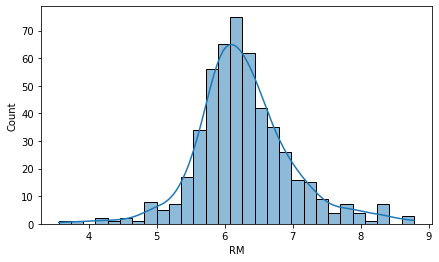

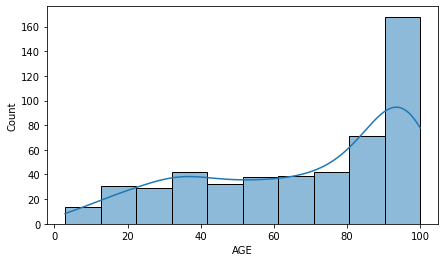

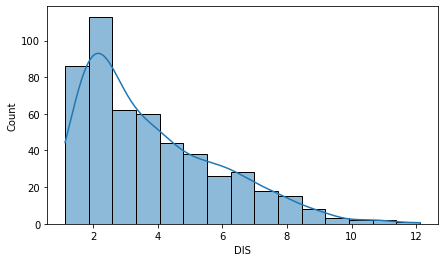

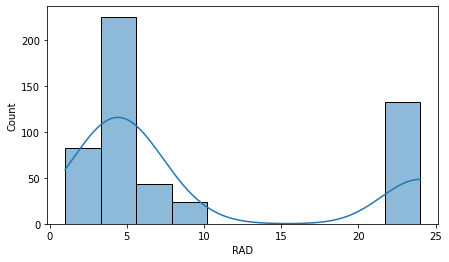

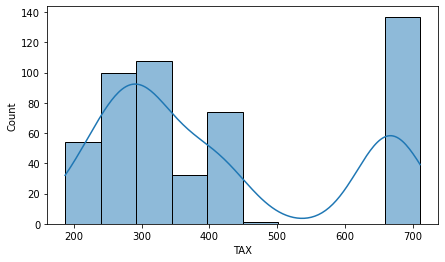

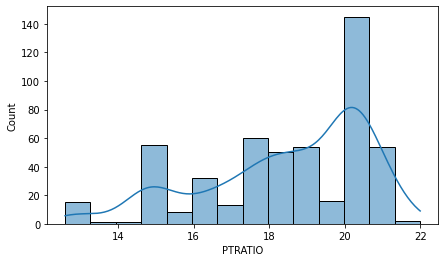

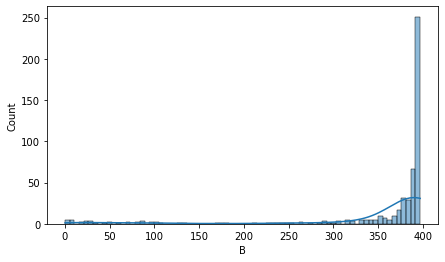

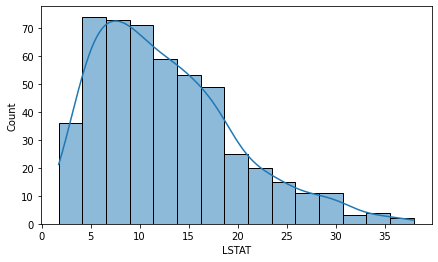

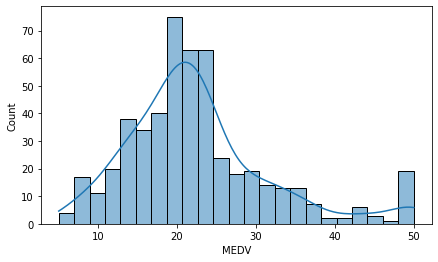

In [13]:
# let's plot all the columns to look at their distributions
for i in df.columns:
    plt.figure(figsize=(7, 4))
    sns.histplot(data=df, x=i, kde = True)
    plt.show()

**Observations**
* **The variables CRIM and ZN are positively skewed.** This suggests that most of the areas have lower crime rates and most residential plots are under the area of 25,000 sq. ft.
* **The variable CHAS, with only 2 possible values 0 and 1, follows a binomial distribution**, and the majority of the houses are away from Charles river (CHAS = 0).
* The distribution of the variable AGE suggests that many of the owner-occupied houses were built before 1940. 
* **The variable DIS** (average distances to five Boston employment centers) **has a nearly exponential distribution**, which indicates that most of the houses are closer to these employment centers.
* **The variables TAX and RAD have a bimodal distribution.**, indicating that the tax rate is possibly higher for some properties which have a high index of accessibility to radial highways.  
* The dependent variable MEDV seems to be slightly right skewed.

As the dependent variable is sightly skewed, we will apply a **log transformation on the 'MEDV' column** and check the distribution of the transformed column.

In [15]:
df['MEDV_log'] = np.log(df['MEDV'])

<AxesSubplot:xlabel='MEDV_log', ylabel='Count'>

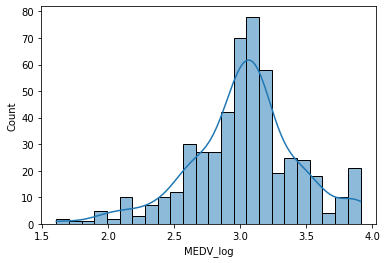

In [16]:
sns.histplot(data=df,x='MEDV_log',kde=True)

**Observations**
* The log-transformed variable (**MEDV_log**) appears to have a **nearly normal distribution without skew**, and hence we can proceed.

Before creating the linear regression model, it is important to check the bivariate relationship between the variables. Let's check the same using the heatmap and scatterplot.

## Bivariate Analysis

Let's check the correlation using a heatmap

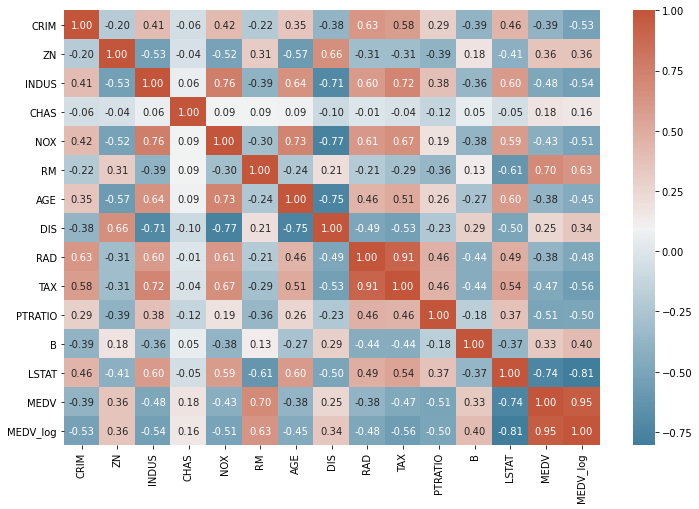

In [17]:
plt.figure(figsize = (12,8))
cmap = sns.diverging_palette(230,20,as_cmap=True)
sns.heatmap(df.corr(),annot=True,fmt='.2f',cmap=cmap)
plt.show()

**Observations:**

* We see a significantly correlated relationship between NOX and INDUS. 

* NOX also has a high positive correlation value with Age, as well as a significantly negatively correlated value with DIS.

* MEDV has a high correlation value with RM, and also significantly negatively correlated with LSTAT.

* INDUS has a high correlation value with TAX

Now, we will visualize the relationship between the pairs of features having significant correlations.

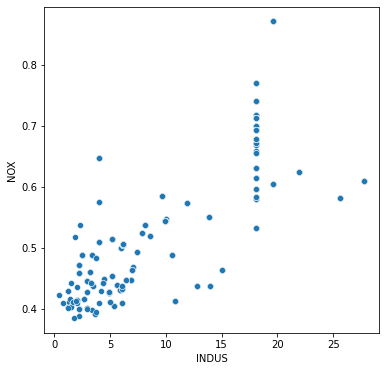

In [18]:
# scatterplot to visualize the relationship between NOX and INDUS
plt.figure(figsize=(6, 6))
sns.scatterplot(x = 'INDUS', y = 'NOX', data = df) #write you code here
plt.show()

**Observations:**

* There seems to be a somewhat positive relationship between the nitric oxides concentration and the proportion of non-retail business acres per town. When the proportion gets higher, there also seems to be a higher concentration of nitric oxides. 

* There are a number of data points that are on a vertical line at some point between the 15 and 20 values for INDUS.  

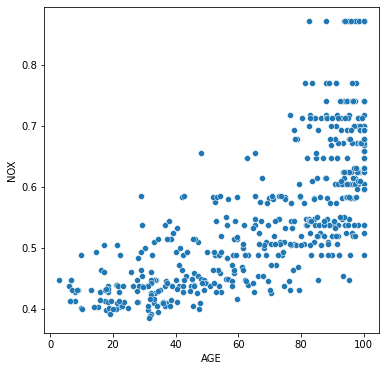

In [19]:
# scatterplot to visualize the relationship between AGE and NOX
plt.figure(figsize=(6, 6))
sns.scatterplot(x='AGE', y = 'NOX', data = df)   #Write your code here
plt.show()

**Observations:**

* When the proportion of owner occupied units built before 1940 gets higher, there also seems to be a higher concentration of Nitric oxides, thus, we can see a positive relationship. It is not the strongest relationship however, as we can see a good number of higher end AGE data points that are associated with low nitric oxides concentrations. 

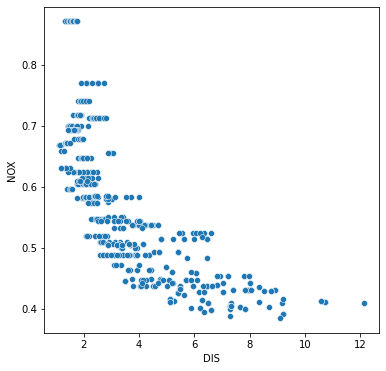

In [20]:
# scatterplot to visualize the relationship between DIS and NOX
plt.figure(figsize=(6, 6))
sns.scatterplot(x = 'DIS', y = 'NOX', data = df) #Write your code here
plt.show()

**Observations:**

* We can see a negative, and somewhat curved relationship between nitric oxide concentration levels and weighted distances to five Boston employment centers. 

* Lower weighted distances seem to be associated with higher nitric oxide concentration levels, and higher weighted distances seem to be associated with lower nitric oxide concentration levels. 

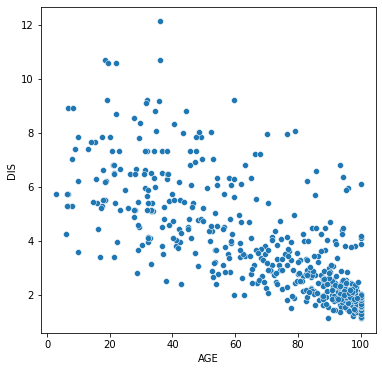

In [21]:
# scatterplot to visualize the relationship between AGE and DIS
plt.figure(figsize=(6, 6))
sns.scatterplot(x = 'AGE', y = 'DIS', data = df)
plt.show()

**Observations:**
* The distance of the houses to the Boston employment centers appears to decrease moderately as the the proportion of the old houses increase in the town. It is possible that the Boston employment centers are located in the established towns where proportion of owner-occupied units built prior to 1940 is comparatively high.

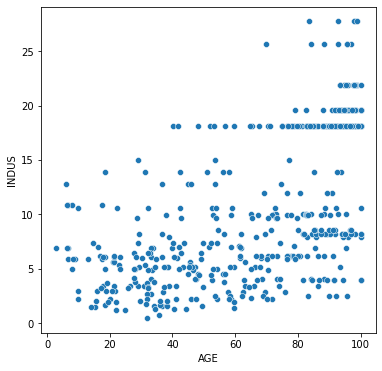

In [22]:
# scatterplot to visualize the relationship between AGE and INDUS
plt.figure(figsize=(6, 6))
sns.scatterplot(x = 'AGE', y = 'INDUS', data = df)
plt.show()

**Observations:**
* No trend between the two variables is visible in the above plot.

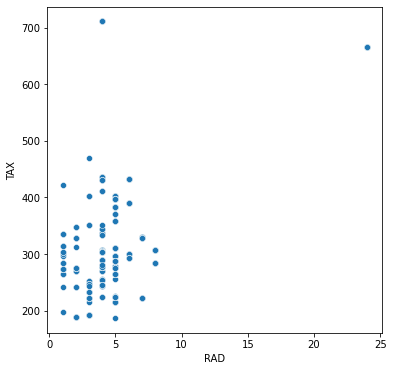

In [23]:
# scatterplot to visulaize the relationship between RAD and TAX
plt.figure(figsize=(6, 6))
sns.scatterplot(x = 'RAD', y = 'TAX', data = df)
plt.show()

**Observations:**
* The correlation between RAD and TAX is very high. But, no trend is visible between the two variables. 
This might be due to outliers. 

Let's check the correlation after removing the outliers.

In [25]:
# removing the data corresponding to high tax rate
df1 = df[df['TAX'] < 600]
# importing the required function
from scipy.stats import pearsonr
# calculating the correlation
print('The correlation between TAX and RAD is', pearsonr(df1['TAX'], df1['RAD'])[0])

The correlation between TAX and RAD is 0.249757313314292


So the high correlation between TAX and RAD is due to the outliers. The tax rate for some properties might be higher due to some other reason.

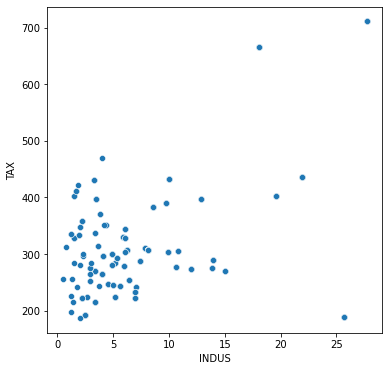

In [26]:
# scatterplot to visualize the relationship between INDUS and TAX
plt.figure(figsize=(6, 6))
sns.scatterplot(x = 'INDUS', y = 'TAX', data = df)
plt.show()

**Observations:**
* The tax rate appears to increase with an increase in the proportion of non-retail business acres per town. This might be due to the reason that the variables TAX and INDUS are related with a third variable.

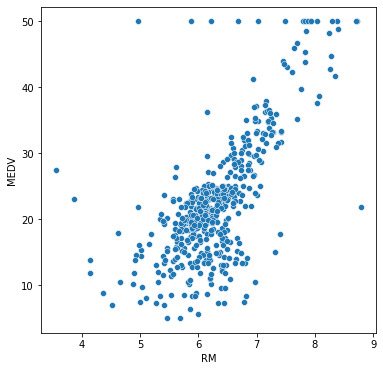

In [27]:
# scatterplot to visulaize the relationship between RM and MEDV
plt.figure(figsize=(6, 6))
sns.scatterplot(x = 'RM', y = 'MEDV', data = df)
plt.show()

**Observations:**
* The price of the house seems to increase as the value of RM increases. This is expected as the price is generally higher for more rooms.

* There are a few outliers in a horizontal line as the MEDV value seems to be capped at 50.

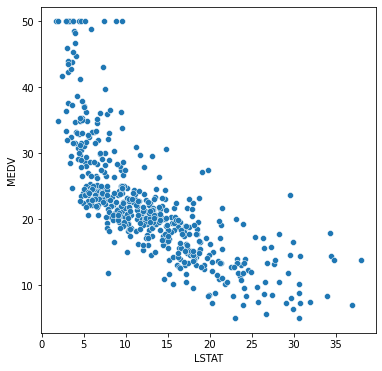

In [28]:
# scatterplot to visulaize the relationship between LSTAT and MEDV
plt.figure(figsize=(6, 6))
sns.scatterplot(x = 'LSTAT', y = 'MEDV', data = df)
plt.show()

**Observations:**
* The price of the house tends to decrease with an increase in LSTAT. This is also possible as the house price is lower in areas where lower status people live.
* There are few outliers and the data seems to be capped at 50.

We have seen that the variables LSTAT and RM have a linear relationship with the dependent variable MEDV. Also, there are significant relationships among a few independent variables, which is not desirable for a linear regression model. Let's first split the dataset.

### Splitting the Dataset

Let's split the dataset into the dependent and independent variables and further split it into train and test set in a ratio of 70:30 for train and test set.

In [29]:
# separate the dependent and independent variable
Y = df['MEDV_log']
X = df.drop(columns = {'MEDV', 'MEDV_log'})

# add the intercept term
X = sm.add_constant(X)

In [30]:
# splitting the data in 70:30 ratio of train to test data
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.30 , random_state=1)

Next, we will check the multicollinearity in the train dataset.

### Checking for Multicollinearity

We will use the Variance Inflation Factor (VIF), to check if there is multicollinearity in the data.

Features having a VIF score > 5 will be dropped/treated till all the features have a VIF score < 5

In [31]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

# function to check VIF
def checking_vif(train):
    vif = pd.DataFrame()
    vif["feature"] = train.columns

    # calculating VIF for each feature
    vif["VIF"] = [
        variance_inflation_factor(train.values, i) for i in range(len(train.columns))
    ]
    return vif


print(checking_vif(X_train))

    feature         VIF
0     const  585.099960
1      CRIM    1.993439
2        ZN    2.743911
3     INDUS    4.004462
4      CHAS    1.078490
5       NOX    4.430555
6        RM    1.879494
7       AGE    3.155351
8       DIS    4.361514
9       RAD    8.369185
10      TAX   10.194047
11  PTRATIO    1.948555
12        B    1.385213
13    LSTAT    2.926462


**Observations:**
* There are two variables with a high VIF - RAD and TAX. Let's remove TAX as it has the highest VIF values and check the multicollinearity again.

In [32]:
# creating the model after dropping TAX
X_train = X_train.drop(columns = {'TAX'})

# checking for VIF
print(checking_vif(X_train))

    feature         VIF
0     const  581.372515
1      CRIM    1.992236
2        ZN    2.483521
3     INDUS    3.277778
4      CHAS    1.052841
5       NOX    4.397232
6        RM    1.876243
7       AGE    3.154114
8       DIS    4.339453
9       RAD    2.978247
10  PTRATIO    1.914523
11        B    1.384927
12    LSTAT    2.924524


Now, we will create the linear regression model as the VIF is less than 5 for all the independent variables, and we can assume that multicollinearity has been removed between the variables.

## Model Building

In [33]:
# create the model
model1 = sm.OLS(y_train, X_train).fit()


# get the model summary
model1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:               MEDV_log   R-squared:                       0.771
Model:                            OLS   Adj. R-squared:                  0.763
Method:                 Least Squares   F-statistic:                     95.56
Date:                Thu, 28 Oct 2021   Prob (F-statistic):          2.97e-101
Time:                        12:06:14   Log-Likelihood:                 78.262
No. Observations:                 354   AIC:                            -130.5
Df Residuals:                     341   BIC:                            -80.22
Df Model:                          12                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          4.4999      0.253     17.767      0.000       4.002       4.998
CRIM          -0.0122      0.002     -7.005      0.000      -0.016      -0.009
ZN             0.0010      0.001      1.417      0.157      -0.000       0.002
INDUS         -0.0002      0.003     -0.066      0.947      -0.006       0.005
CHAS           0.1164      0.039      3.008      0.003       0.040       0.193
NOX           -1.0297      0.187     -5.509      0.000      -1.397      -0.662
RM             0.0569      0.021      2.734      0.007       0.016       0.098
AGE            0.0003      0.001      0.390      0.697      -0.001       0.002
DIS           -0.0496      0.010     -4.841      0.000      -0.070      -0.029
RAD            0.0080      0.002      3.885      0.000       0.004       0.012
PTRATIO       -0.0458      0.007     -6.762      0.000      -0.059      -0.033
B              0.0002      0.000      1.796      0.073   -2.35e-05       0.001
LSTAT         -0.0291      0.002    -11.772      0.000      -0.034      -0.024
==============================================================================
Omnibus:                       33.707   Durbin-Watson:                   1.924
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              100.726
Skew:                           0.387   Prob(JB):                     1.34e-22
Kurtosis:                       5.496   Cond. No.                     1.01e+04
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.01e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

**Observations:**

* The R-Squared valued value is 0.771, and the adjusted R_Squared value is 0.763

* The P-Values for CRIM, CHAS, NOX, RM, DIS, RAD, PTRATIO, and LSTAT all look statistically significant as they are either zero or close to it. 

### Examining the significance of the model

It is not enough to fit a multiple regression model to the data, it is necessary to check whether all the regression coefficients are significant or not. Significance here means whether the population regression parameters are significantly different from zero. 

From the above it may be noted that the regression coefficients corresponding to ZN, AGE, B, and INDUS are not statistically significant at level α = 0.05. In other words, the regression coefficients corresponding to these three are not significantly different from 0 in the population. Hence, we will eliminate the three features and create a new model.

In [34]:
# creating the model after dropping columns 'MEDV', 'MEDV_log', 'TAX', 'ZN', 'AGE', 'B' 'INDUS' from df dataframe
Y = df['MEDV_log']
X = df.drop(columns = {'MEDV', 'MEDV_log', 'TAX', 'ZN', 'AGE', 'B', 'INDUS'}) 
X = sm.add_constant(X)

#splitting the data in 70:30 ratio of train to test data
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.30 , random_state=1)

# create the model
model2 = sm.OLS(y_train, X_train).fit() #write your code here
# get the model summary
model2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:               MEDV_log   R-squared:                       0.767
Model:                            OLS   Adj. R-squared:                  0.762
Method:                 Least Squares   F-statistic:                     142.1
Date:                Thu, 28 Oct 2021   Prob (F-statistic):          2.61e-104
Time:                        12:15:01   Log-Likelihood:                 75.486
No. Observations:                 354   AIC:                            -133.0
Df Residuals:                     345   BIC:                            -98.15
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          4.6494      0.242     19.242      0.000       4.174       5.125
CRIM          -0.0125      0.002     -7.349      0.000      -0.016      -0.009
CHAS           0.1198      0.039      3.093      0.002       0.044       0.196
NOX           -1.0562      0.168     -6.296      0.000      -1.386      -0.726
RM             0.0589      0.020      2.928      0.004       0.019       0.098
DIS           -0.0441      0.008     -5.561      0.000      -0.060      -0.028
RAD            0.0078      0.002      3.890      0.000       0.004       0.012
PTRATIO       -0.0485      0.006     -7.832      0.000      -0.061      -0.036
LSTAT         -0.0293      0.002    -12.949      0.000      -0.034      -0.025
==============================================================================
Omnibus:                       32.514   Durbin-Watson:                   1.925
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               87.354
Skew:                           0.408   Prob(JB):                     1.07e-19
Kurtosis:                       5.293   Cond. No.                         690.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

**Observations:**
* We can see that the **R-squared value has decreased by 0.004**, since we have removed variables from the model, whereas the **adjusted R-squared value has decreased by 0.001.**

Now, we will check the linear regression assumptions.

### Checking the below linear regression assumptions

1. **Mean of residuals should be 0**
2. **No Heteroscedasticity**
3. **Linearity of variables**
4. **Normality of error terms**

**Checking for mean residuals**

In [36]:
residuals = model2.resid

residuals.mean()

-1.9595122762310673e-15

**Observations:**

* The mean of the residuals is very close to 0, therefore, the assumption for residuals is satisfied

#### Checking for homoscedasticity

* Homoscedasticity - If the residuals are symmetrically distributed across the regression line, then the data is said to homoscedastic.

* Heteroscedasticity - If the residuals are not symmetrically distributed across the regression line, then the data is said to be heteroscedastic. In this case, the residuals can form a funnel shape or any other non-symmetrical shape.

* We'll use `Goldfeldquandt Test` to test the following hypothesis with alpha = 0.05:

    - Null hypothesis: Residuals are homoscedastic
    - Alternate hypothesis: Residuals have heteroscedastic

In [37]:
from statsmodels.stats.diagnostic import het_white
from statsmodels.compat import lzip
import statsmodels.stats.api as sms

In [38]:
name = ["F statistic", "p-value"]
test = sms.het_goldfeldquandt(y_train, X_train)
lzip(name, test)

[('F statistic', 1.0835082923425294), ('p-value', 0.30190120067668674)]

**Observations:**

* The above test shows that the p-value is greater than 0.05 which is not stastitically significant and therefore means that we fail to reject the null-hypothesis which says that residuals are homoscedastic, therefore- the assumption for no heteroscedasticity is satisfied. 

#### Linearity of variables

It states that the predictor variables must have a linear relation with the dependent variable.

To test the assumption, we'll plot residuals and fitted values on a plot and ensure that residuals do not form a strong pattern. They should be randomly and uniformly scattered on the x-axis.

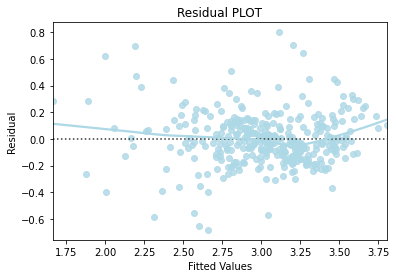

In [39]:
# predicted values
fitted = model2.fittedvalues

# sns.set_style("whitegrid")
sns.residplot(x = fitted, y = residuals, color="lightblue", lowess=True) #write your code here
plt.xlabel("Fitted Values")
plt.ylabel("Residual")
plt.title("Residual PLOT")
plt.show()

**Observations:**

* The above plot shows that there is no clear pattern, and that the points are randomly and uniformly scattered on the x axist, and therefore the linearity assumption is satisfied. 

#### Normality of error terms
The residuals should be normally distributed.

<AxesSubplot:ylabel='Count'>

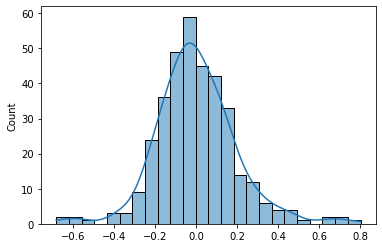

In [40]:
# Plot histogram of residuals
sns.histplot(residuals, kde = True)

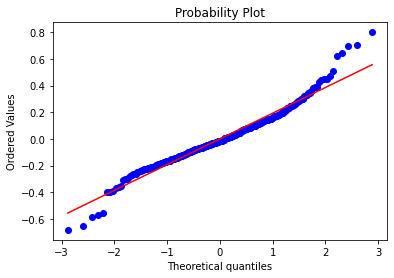

In [41]:
# Plot q-q plot of residuals
import pylab
import scipy.stats as stats

stats.probplot(residuals, dist="norm", plot=pylab)
plt.show()

**Observations:**

The above two graphs show that the residuals are normally distributed, therefore the assumption for normality is satisfied. 

### Checking the performance of the model on the train and test data set

In [42]:
# RMSE
def rmse(predictions, targets):
    return np.sqrt(((targets - predictions) ** 2).mean())


# MAPE
def mape(predictions, targets):
    return np.mean(np.abs((targets - predictions)) / targets) * 100


# MAE
def mae(predictions, targets):
    return np.mean(np.abs((targets - predictions)))


# Model Performance on test and train data
def model_pref(olsmodel, x_train, x_test):

    # In-sample Prediction
    y_pred_train = olsmodel.predict(x_train)
    y_observed_train = y_train

    # Prediction on test data
    y_pred_test = olsmodel.predict(x_test)
    y_observed_test = y_test

    print(
        pd.DataFrame(
            {
                "Data": ["Train", "Test"],
                "RMSE": [
                    rmse(y_pred_train, y_observed_train),
                    rmse(y_pred_test, y_observed_test),
                ],
                "MAE": [
                    mae(y_pred_train, y_observed_train),
                    mae(y_pred_test, y_observed_test),
                ],
                "MAPE": [
                    mape(y_pred_train, y_observed_train),
                    mape(y_pred_test, y_observed_test),
                ],
            }
        )
    )


# Checking model performance
model_pref(model2, X_train, X_test)  

    Data      RMSE       MAE      MAPE
0  Train  0.195504  0.143686  4.981813
1   Test  0.198045  0.151284  5.257965


**Observations:**

* The mean absolute percentage error is 4.98 on the training data and 5.26 on the test data

* The mean absolute error is 0.14 on the training data and 0.15 on the test data. 

* The Root Mean Squared Error is 0.196 on the training data and 0.198 on the test data. We use this value to assess how accurately the model predicts the response.  

### Applying cross validation to improve the model and evaluating it using different evaluation metrics

In [43]:
# import the required function

from sklearn.model_selection import cross_val_score

# build the regression model and cross-validate
linearregression = LinearRegression()                                    

cv_Score11 = cross_val_score(linearregression, X_train, y_train, cv = 10)
cv_Score12 = cross_val_score(linearregression, X_train, y_train, cv = 10, 
                             scoring = 'neg_mean_squared_error')                              


print("RSquared: %0.3f (+/- %0.3f)" % (cv_Score11.mean(), cv_Score11.std() * 2))
print("Mean Squared Error: %0.3f (+/- %0.3f)" % (-1*cv_Score12.mean(), cv_Score12.std() * 2))

RSquared: 0.729 (+/- 0.232)
Mean Squared Error: 0.041 (+/- 0.023)


**Observations**
- The R-squared on the cross validation is 0.729, whereas on the training dataset it was 0.769
- And the MSE on cross validation is 0.041, whereas on the training dataset it was 0.038

We may want to reiterate the model building process again with new features or better feature engineering to increase the R-squared and decrease the MSE on cross validation.

### Let's get model coefficients in a pandas dataframe with column 'Feature' having all the features and column 'Coefs' with all the corresponding Coefs. We will then write the regression equation.

In [45]:
coef1 = pd.DataFrame({"Features":model2.params, "Coefs":np.transpose(model2.params.values)})

Equation = "log (Price) ="
print(Equation, end='\t')
for i in range(len(coef1)):
    print('(', coef1['Features'][i], ') * ', coef1.index[i], '+', end = ' ')

log (Price) =	( 4.649385823266647 ) *  const + ( -0.012500455079103572 ) *  CRIM + ( 0.11977319077019613 ) *  CHAS + ( -1.0562253516683222 ) *  NOX + ( 0.05890657510927938 ) *  RM + ( -0.04406889079940524 ) *  DIS + ( 0.007848474606243452 ) *  RAD + ( -0.04850362079499934 ) *  PTRATIO + ( -0.02927704047979679 ) *  LSTAT + 

**Conclusions** 

* First we did EDA on the data set and did initial visual analysis on the variables including both univariate and bivariate analysis. 

* We then checked for multicollinearity, and dropped the TAX column as a result. 

* Then we ran our linear regression model on the data and observed the results. Following that, we dropped variables that were not significant and examined the changes in the R-Squared variable. 

* Checked to make sure our model satisfies the assumptions of linear regression. 

* We then checked the performance of our model using various evaluation metrics including cross validation. 

* We then finalized our regression equation